<a href="https://colab.research.google.com/github/berberberk/apnd-fs-2024/blob/main/APND4_Self_Oscillations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint, solve_ivp
from scipy.integrate import solve_ivp
from matplotlib.animation import FuncAnimation
from matplotlib import rc
rc('animation', html='jshtml')

## Уравнения Лотка-Вольтерры


\begin{cases}
\frac{dN_1}{dt} = (\varepsilon_1 - \gamma_1 \cdot N_2) \cdot N_1 - \alpha \cdot N_1^2, \\[10pt]
\frac{dN_2}{dt} = (-\varepsilon_2 + \gamma_2 \cdot N_1) \cdot N_2 - \alpha \cdot N_2^2.
\end{cases}


### $\alpha$ = 0

In [36]:
# Параметры, вариант 16
e1, y1, e2, y2 = 4, 3.5, 2, 3

# стационарные точки
N2_0 = e1 / y1 # Хищники
N1_0 = e2 / y2 # Жертвы

def system(t, N, alpha=0):
    N1, N2 = N
    dN1dt = e1 * N1 - y1 * N1 * N2 - alpha * N1 ** 2
    dN2dt = -e2 * N2 + y2 * N1 * N2 - alpha * N2 ** 2
    return [dN1dt, dN2dt]

# Время
t = np.linspace(0, 100, 10000)

init = [3, 1]  # [популяция жертв, популяция хищников]

sol = solve_ivp(system, (0, 100), init, dense_output=True)
N1, N2 = sol.sol(t)

Text(0, 0.5, 'N2 (Хищник)')

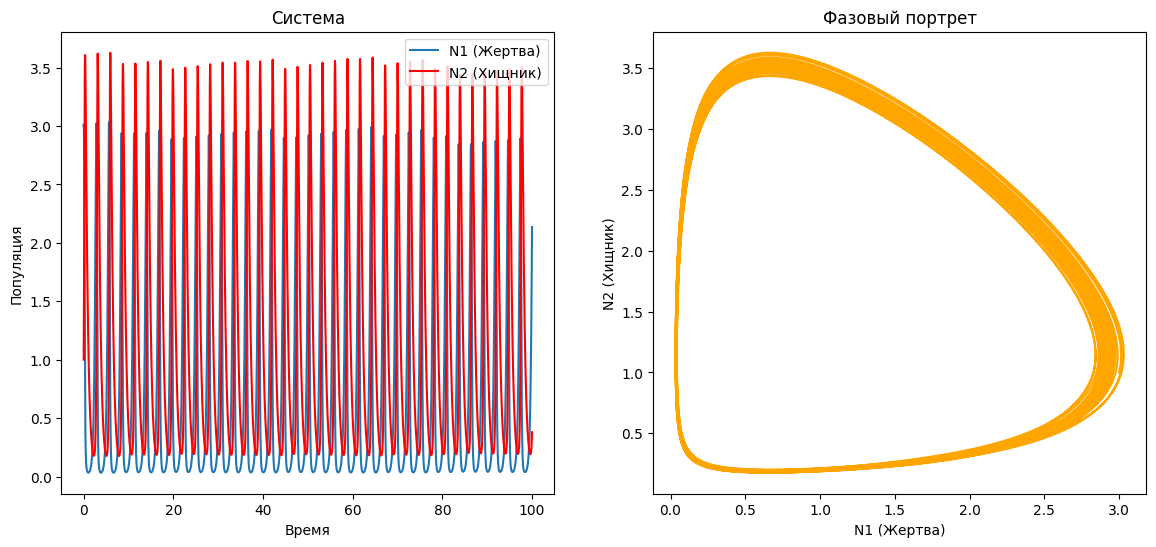

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=None)
axs[0].plot(t, N1, label="N1 (Жертва)")
axs[0].plot(t, N2, label="N2 (Хищник)", c='r')
axs[0].set_title("Система")
axs[0].set_xlabel("Время")
axs[0].set_ylabel("Популяция")
axs[0].legend()
axs[1].plot(N1, N2, c='orange')
axs[1].set_title("Фазовый портрет")
axs[1].set_xlabel("N1 (Жертва)")
axs[1].set_ylabel("N2 (Хищник)")

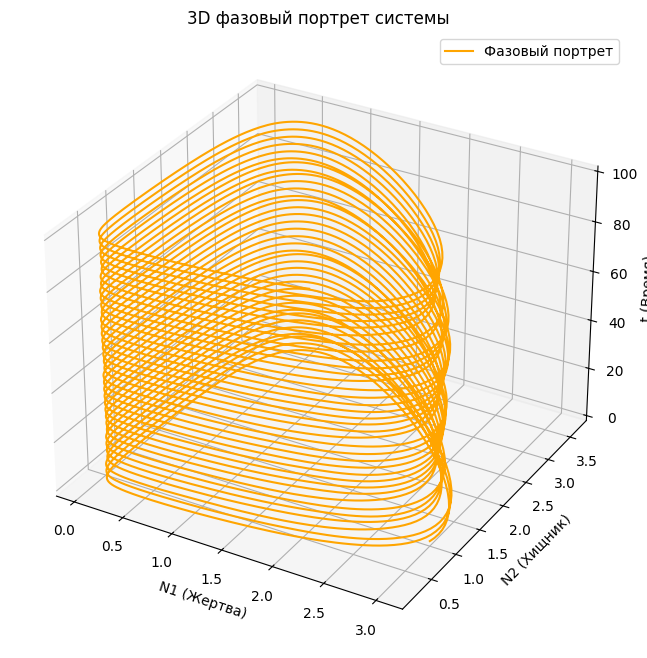

In [38]:
# Создание 3D графика
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Построение 3D графика
ax.plot(N1, N2, t, c='orange', label='Фазовый портрет')

# Настройка меток осей
ax.set_xlabel('N1 (Жертва)')
ax.set_ylabel('N2 (Хищник)')
ax.set_zlabel('t (Время)')
ax.set_title('3D фазовый портрет системы')

# Показать легенду
ax.legend()

# Показ графика
plt.show()

### $\alpha$ = 0.05

In [39]:
e1, y1, e2, y2, alpha = 4, 3.5, 2, 3, 0.05

x, y = sp.symbols('x y')

f1 = e1 * x - y1 * x * y - alpha * x ** 2
f2 = -e2 * y + y2 * x * y - alpha * y ** 2

equilibrium_points = sp.solve([f1, f2], (x, y))
J = sp.Matrix([[sp.diff(f1, x), sp.diff(f1, y)],
               [sp.diff(f2, x), sp.diff(f2, y)]])
for point in equilibrium_points:
    J_at_eq = J.subs({x: point[0], y: point[1]})
    eigenvals = J_at_eq.eigenvals()

    print(f"\nСобственные значения в точке покоя {point}: {list(eigenvals.keys())}")
# неустойчивый узел
# седло
# устойчивый фокус
# седло

init = [3, 1]
sol = solve_ivp(system, (0, 100), init, args=(alpha,), dense_output=True)
N1, N2 = sol.sol(t)


Собственные значения в точке покоя (0.0, -40.0000000000000): [144.000000000000, 2.00000000000000]

Собственные значения в точке покоя (0.0, 0.0): [4, -2]

Собственные значения в точке покоя (0.685551059271602, 1.13306355629612): [-0.0454653653891932 - 2.85586948334165*I, -0.0454653653891932 + 2.85586948334165*I]

Собственные значения в точке покоя (80.0000000000000, 0.0): [-4.00000000000000, 238.000000000000]


Text(0, 0.5, 'N2')

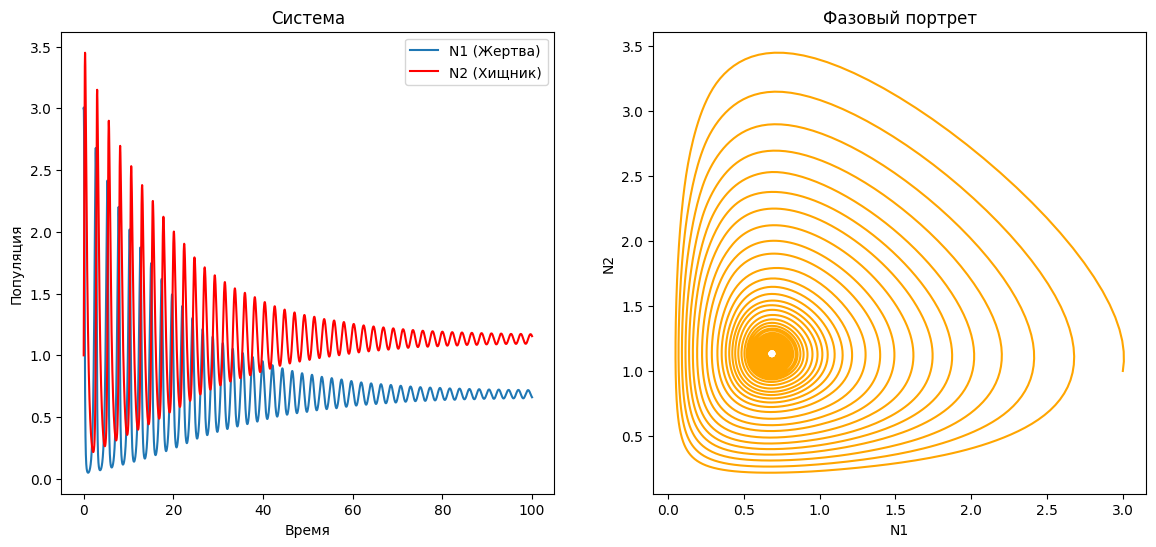

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=None)
axs[0].plot(t, N1, label="N1 (Жертва)")
axs[0].plot(t, N2, label="N2 (Хищник)", c='r')
axs[0].set_title("Система")
axs[0].set_xlabel("Время")
axs[0].set_ylabel("Популяция")
axs[0].legend()

axs[1].plot(N1, N2, c='orange')
axs[1].set_title("Фазовый портрет")
axs[1].set_xlabel("N1")
axs[1].set_ylabel("N2")
# axs[1].set_xlim(0.1, 1.25)
# axs[1].set_ylim(0.575, 1.7)

In [ ]:

N1, N2 = sol.y
t = sol.t

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title("Анимированный фазовый портрет")
ax.set_xlabel("N1 (Жертва)")
ax.set_ylabel("N2 (Хищник)")
line, = ax.plot([], [], lw=2)
point, = ax.plot([], [], 'ro')
ax.grid()
ax.set_xlim(N1.min() - 1, N1.max() + 1)
ax.set_ylim(N2.min() - 1, N2.max() + 1)

def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

def update(frame):
    line.set_data(N1[:frame], N2[:frame])
    point.set_data(N1[frame], N2[frame])
    return line, point

ani = FuncAnimation(fig, update, frames=len(t), init_func=init, blit=True, interval=5)
plt.close(fig)
ani

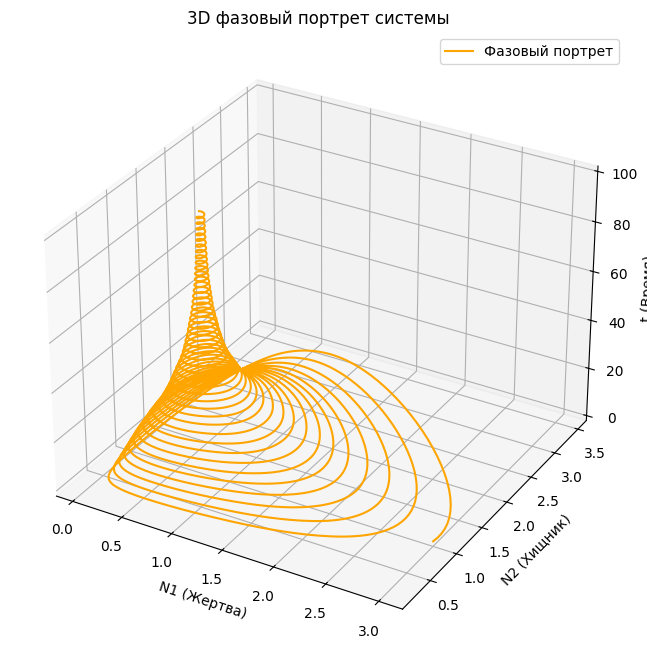

In [41]:
# Создание 3D графика
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Построение 3D графика
ax.plot(N1, N2, t, c='orange', label='Фазовый портрет')

# Настройка меток осей
ax.set_xlabel('N1 (Жертва)')
ax.set_ylabel('N2 (Хищник)')
ax.set_zlabel('t (Время)')
ax.set_title('3D фазовый портрет системы')

# Показать легенду
ax.legend()

# Показ графика
plt.show()

### $\alpha$ = -0.05

In [49]:
e1, y1, e2, y2, alpha = 4, 3.5, 2, 3, -0.05

x, y = sp.symbols('x y')

f1 = e1 * x - y1 * x * y - alpha * x ** 2
f2 = -e2 * y + y2 * x * y - alpha * y ** 2

equilibrium_points = sp.solve([f1, f2], (x, y))
J = sp.Matrix([[sp.diff(f1, x), sp.diff(f1, y)],
               [sp.diff(f2, x), sp.diff(f2, y)]])
for point in equilibrium_points:
    J_at_eq = J.subs({x: point[0], y: point[1]})
    eigenvals = J_at_eq.eigenvals()

    print(f"\nСобственные значения в точке покоя {point}: {list(eigenvals.keys())}")
# устойчивый узел
# седло
# седло
# неустойчивый фокус

t = np.linspace(0, 100, 10000)
init = [3, 1]
sol = solve_ivp(system, (0, 100), init, args=(alpha,), dense_output=True)
N1, N2 = sol.sol(t)


Собственные значения в точке покоя (-80.0000000000000, 0.0): [-4.00000000000000, -242.000000000000]

Собственные значения в точке покоя (0.0, 0.0): [4, -2]

Собственные значения в точке покоя (0.0, 40.0000000000000): [-136.000000000000, 2.00000000000000]

Собственные значения в точке покоя (0.647464889312069, 1.15210664127589): [0.0449892882646991 - 2.79862486314573*I, 0.0449892882646991 + 2.79862486314573*I]


Text(0, 0.5, 'N2')

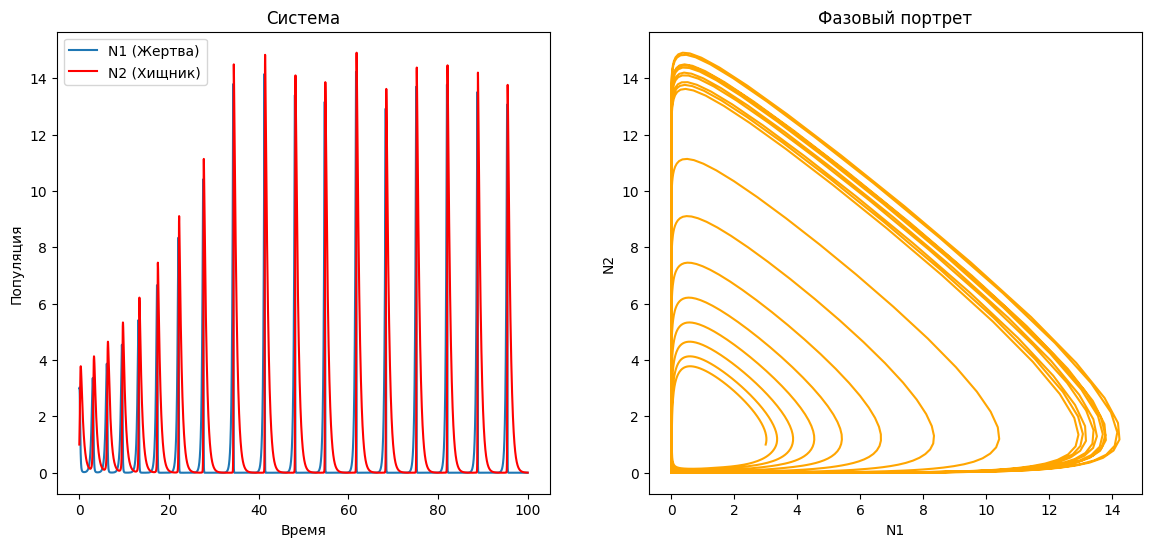

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=None)
axs[0].plot(t, N1, label="N1 (Жертва)")
axs[0].plot(t, N2, label="N2 (Хищник)", c='r')
axs[0].set_title("Система")
axs[0].set_xlabel("Время")
axs[0].set_ylabel("Популяция")
axs[0].legend()

axs[1].plot(N1, N2, c='orange')
axs[1].set_title("Фазовый портрет")
axs[1].set_xlabel("N1")
axs[1].set_ylabel("N2")

In [ ]:
N1, N2 = sol.y
t = sol.t

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title("Анимированный фазовый портрет")
ax.set_xlabel("N1 (Жертва)")
ax.set_ylabel("N2 (Хищник)")
line, = ax.plot([], [], lw=2)
point, = ax.plot([], [], 'ro')
ax.grid()
ax.set_xlim(N1.min() - 1, N1.max() + 1)
ax.set_ylim(N2.min() - 1, N2.max() + 1)

def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

def update(frame):
    line.set_data(N1[:frame], N2[:frame])
    point.set_data(N1[frame], N2[frame])
    return line, point

ani = FuncAnimation(fig, update, frames=len(t), init_func=init, blit=True, interval=5)
plt.close(fig)
ani

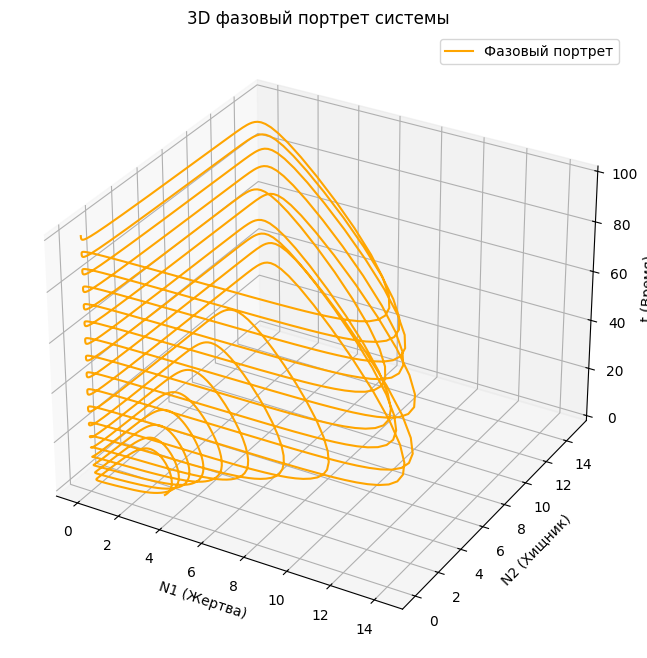

In [51]:
# Создание 3D графика
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Построение 3D графика
ax.plot(N1, N2, t, c='orange', label='Фазовый портрет')

# Настройка меток осей
ax.set_xlabel('N1 (Жертва)')
ax.set_ylabel('N2 (Хищник)')
ax.set_zlabel('t (Время)')
ax.set_title('3D фазовый портрет системы')

# Показать легенду
ax.legend()

# Показ графика
plt.show()